# Lab: Logistic Regression Analysis

For this lab, we will use the CustomerChurn.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to customer characteristics, as well as a variable indicating whether or not they churned. As discussed in class the goal of this exercise is to predict whether or not a customer will churn. 

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In order to use 'Churn' as a target variable, we need to encode it to 0 - 1 (or True - False) instead of yes / no. Use np.where to create a variable called y, which has the value 1 or True whenever 'Churn' is yes, and 0 or False otherwise.

In [19]:
df = pd.read_csv("Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df["Churn"] = np.where(df["Churn"] == "Yes",1,0)

First, we would like use 'tenure' as an explanatory variable. Declare this as your variable X, add a constant term and run a logistic regression of 'Churn' on 'tenure'. Interpret the values of the model.

In [6]:
df["tenure"]

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

In [7]:
X = df["tenure"]
X = sm.add_constant(X)
Y = df["Churn"]
model = sm.Logit(Y,X)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.510569
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7041
Method:                           MLE   Df Model:                            1
Date:                Sun, 22 Nov 2020   Pseudo R-squ.:                  0.1176
Time:                        17:24:26   Log-Likelihood:                -3595.9
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                2.106e-210
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0273      0.042      0.647      0.518      -0.055       0.110
tenure        -0.0388      0.001    -27.586      0.000      -0.042      -0.036
==============================================================================
"""

Next, we would like to add the variable 'Senior Citizen' to the model. Run a logistic regression of 'Churn' on 'tenure' and 'SeniorCitizen'. Interpret the values of the model.

In [8]:
X = df[["tenure","SeniorCitizen"]]
X = sm.add_constant(X)
Y = df["Churn"]
model = sm.Logit(Y,X)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.496871
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7040
Method:                           MLE   Df Model:                            2
Date:                Sun, 22 Nov 2020   Pseudo R-squ.:                  0.1413
Time:                        17:24:29   Log-Likelihood:                -3499.5
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                1.038e-250
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1232      0.044     -2.801      0.005      -0.209      -0.037
tenure           -0.0405      0.001    -27.981      0.000      -0.043      -0.038
SeniorCitizen     1.0465      0.075     13.964      0.000       0.900       1.193
=================================================================================
"""

Finally, we would like to add the variable 'Contract' to the model. Please inspect the possible values for 'Contract'. What type of variable is it?

In [9]:
df["Contract"]

0       Month-to-month
1             One year
2       Month-to-month
3             One year
4       Month-to-month
             ...      
7038          One year
7039          One year
7040    Month-to-month
7041    Month-to-month
7042          Two year
Name: Contract, Length: 7043, dtype: object

Please convert Contract to dummy variables, and add it to the matrix of explanatory variables. Then run a logistic regression of 'Churn' on 'tenure', 'SeniorCitizen' and 'Contract'. Interpret the values of the model.

In [10]:
df[["Month-to-month","One year","Two year"]] = pd.get_dummies(df["Contract"])

In [13]:
df[["s_no","s_yes"]] = pd.get_dummies(df["SeniorCitizen"])

In [17]:
X = df[["tenure","s_yes","One year","Two year"]]
X = sm.add_constant(X)
Y = df["Churn"]
model = sm.Logit(Y,X)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.466523
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7038
Method:                           MLE   Df Model:                            4
Date:                Sun, 22 Nov 2020   Pseudo R-squ.:                  0.1937
Time:                        17:28:04   Log-Likelihood:                -3285.7
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1061      0.045     -2.344      0.019      -0.195      -0.017
tenure        -0.0197      0.002    -11.157      0.000      -0.023      -0.016
s_yes          0.7413      0.077      9.682      0.000       0.591       0.891
One year      -1.2895      0.097    -13.328      0.000      -1.479      -1.100
Two year      -2.4539      0.162    -15.130      0.000      -2.772      -2.136
==============================================================================
"""

In [23]:
results.predict(X)

0       0.468595
1       0.112563
2       0.463697
3       0.092680
4       0.463697
          ...   
7038    0.133774
7039    0.056636
7040    0.420038
7041    0.635625
7042    0.020651
Length: 7043, dtype: float64

## Bonus Challenge: Feature Selection

Use the above data set on customer churn, and try including and excluding different variables to build the best model. Which criteria can you use for deciding whether a variable is helpful for predicting whether a customer will churn or not?

<AxesSubplot:>

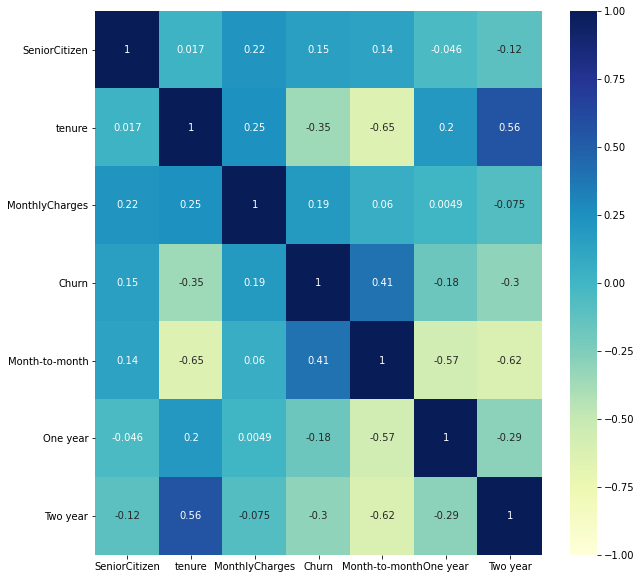

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),vmin=-1,vmax=1,cmap="YlGnBu",annot=True)

In [14]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Month-to-month,One year,Two year,s_no,s_yes
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Yes,Electronic check,29.85,29.85,0,1,0,0,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,Mailed check,56.95,1889.5,0,0,1,0,1,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,Mailed check,53.85,108.15,1,1,0,0,1,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,Bank transfer (automatic),42.30,1840.75,0,0,1,0,1,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Yes,Electronic check,70.70,151.65,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Mailed check,84.80,1990.5,0,0,1,0,1,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Credit card (automatic),103.20,7362.9,0,0,1,0,1,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,Yes,Electronic check,29.60,346.45,0,1,0,0,1,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,Yes,Mailed check,74.40,306.6,1,1,0,0,0,1
